## Sage
`Sage` is free, open-source math software that supports research and teaching in algebra, geometry, number theory, cryptography, numerical computation, and related areas.

It basically does the same that `sympy` does, so we will cover instead the things `sage` can do that `sympy` "cannot".

In [ ]:
%display latex

### Partial fractions

In [ ]:
f = 1/((1+x)*(x-1))
f

In [ ]:
f.partial_fraction(x)

### Rings
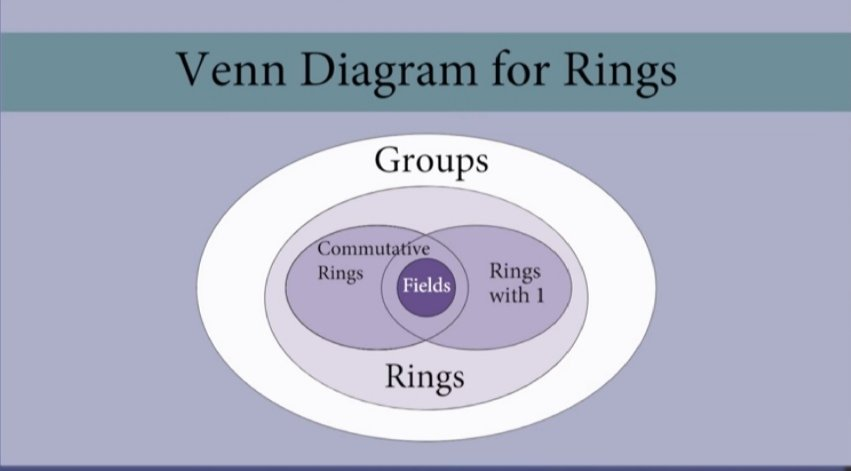

A ring is a mathematical construction in which there are well-behaved notions of addition and multiplication. These are ones of the commonly used rings in `sage`:
- the integers, called `ZZ` in Sage.
- the rational numbers – i.e., fractions, or ratios, of integers – called `QQ` in Sage.
- the real numbers, called `RR` in Sage.
- the complex numbers, called `CC` in Sage.

For instance, the polynomial $x^2-2$ has two roots, $\pm\sqrt{2}$. Those roots are not rational, so if you are working with polynomials with rational coefficients, the polynomial won’t factor. With real coefficients, it will. Therefore you may want to specify the ring to insure that you are getting the information you expect. The following two commands defines the sets of polynomials with rational coefficients and real coefficients, respectively. 

In [ ]:
ratpoly.<t> = PolynomialRing(QQ) # t (polyn. variable)
realpoly.<z> = PolynomialRing(RR) # z (polyn. variable)

In [ ]:
factor(t^2-2)

In [ ]:
factor(z^2-2)

In [ ]:
i # square root of -1

In [ ]:
i in QQ

In [ ]:
1.2 in QQ

In [ ]:
pi in QQ

In [ ]:
pi in RR

In [ ]:
sqrt(2) in QQ

### Finite fields

In [ ]:
realpoly.<m> = GF(3)

### Linear Algebra

In [ ]:
A = Matrix([[1,2,3],[3,2,1],[1,1,1]])
w = vector([1,1,-4])

In [ ]:
w*A

In [ ]:
(-9, 1, -2)

In [ ]:
kernel(A)

In [ ]:
det(A)

In [ ]:
AZ = matrix(ZZ, [[2,0], [0,1]])
AQ = matrix(QQ, [[2,0], [0,1]])
AR = matrix(RR, [[2,0], [0,1]])

In [ ]:
AZ.echelon_form()

In [ ]:
AQ.echelon_form()

In [ ]:
AR.echelon_form()

### Polynomials

In [ ]:
R, t = QQ['t'].objgen()

In [ ]:
f = 2*t^7 + 3*t^2 - 15/19
f^2

In [ ]:
cyclo = R.cyclotomic_polynomial(7)
cyclo

In [ ]:
g = 7 * cyclo * t^5 * (t^5 + 10*t + 2)

In [ ]:
g

In [ ]:
F = factor(g)
F

In [ ]:
F.unit()

In [ ]:
list(F)

In [ ]:
x = QQ['x'].0

In [ ]:
f = x^3 + 1
g = x^2 - 17
h = f/g
h

In [ ]:
h.parent()

In [ ]:
R.<x> = LaurentSeriesRing(QQ)
1/(1-x) + O(x^10)

### Number Theory

In [ ]:
# Primes between a given range
prime_range(1, 20)

In [ ]:
# Factorize a given number
factor(120)

In [ ]:
# Euler's Phi (# of relative primes)
euler_phi(3)

In [ ]:
# Greatest Common Divisor
gcd(24, 36)

In [ ]:
# Least Common Multiple
lcm(24, 36)

In [ ]:
# Inverse mod m
a = 5
m = 11
inverse_mod(a, m)

In [ ]:
inverse_mod(4, 8)

- Count the prime factors of a given number.

In [ ]:
# Linear congruences
solve_mod(2*x == 3, 5)

### Cryptography

In [ ]:
"""
power_mod(a, n, m)
Return the n-th power of a modulo m, where a and m are elements of
a ring that implements the modulo operator "%".
"""
power_mod(2, 388, 399)

In [ ]:
power_mod(2, -1, 7)

In [ ]:
def simple_rsa_example():
    # Generate small primes for demonstration
    p = 11
    q = 17
    n = p * q
    phi = (p-1) * (q-1)
    e = 7  # public exponent
    # Find private exponent
    d = inverse_mod(e, phi)
    
    print(f"Public key: (n={n}, e={e})")
    print(f"Private key: d={d}")
    
    # Example encryption/decryption
    message = 15
    encrypted = power_mod(message, e, n)
    decrypted = power_mod(encrypted, d, n)
    
    print(f"Original message: {message}")
    print(f"Encrypted: {encrypted}")
    print(f"Decrypted: {decrypted}")

simple_rsa_example()

### Basic Plotting

In [ ]:
# Basic 2D plotting
plot(sin(x), (x, -pi, pi))

In [ ]:
# Multiple functions on the same plot
p1 = plot(sin(x), (x, -pi, pi), color='blue')
p2 = plot(cos(x), (x, -pi, pi), color='red')
p1 + p2

In [ ]:
G = graphs.PetersenGraph()
G.show()
G.chromatic_number()

In [ ]:
G = graphs.CubeGraph(3)
G.show()
G.diameter()

In [ ]:
G.degree()

### Group Theory

In [ ]:
# Creating some common groups
klein4 = KleinFourGroup()
d8 = DihedralGroup(4)  # Dihedral group of order 8
s3 = SymmetricGroup(3)  # Symmetric group on 3 elements

In [ ]:
# Displaying group information
def display_group_info(G):
    """Display basic information about a group"""
    print(f"Group: {G}")
    print(f"Order: {G.order()}")
    print(f"Is abelian? {G.is_abelian()}")
    print(f"Elements: {list(G)}")
    print(f"Generators: {G.gens()}")
    print("=" * 50)

In [ ]:
display_group_info(klein4)

In [ ]:
display_group_info(d8)

In [ ]:
display_group_info(s3)

In [ ]:
# Group Tables (Cayley Tables)
def show_cayley_table(G):
    """Display the Cayley table for a group"""
    print(f"Cayley table for {G}:")
    print(G.cayley_table())
show_cayley_table(klein4)

#### Subgroups

In [ ]:
def analyze_subgroups(G):
    """Analyze the subgroup structure of a group"""
    print(f"Analysis of {G}:")
    print("\nSubgroups:")
    for H in G.subgroups():
        print(f"Subgroup of order {H.order()}: {H}")
    
    print("\nNormal Subgroups:")
    for N in G.normal_subgroups():
        print(f"Normal subgroup of order {N.order()}: {N}")
    
    print("\nCenter:")
    print(G.center())

# Example
analyze_subgroups(d8)

In [ ]:
# Cyclic Subgroups
def find_cyclic_subgroups(G):
    """Find all cyclic subgroups of a group"""
    cyclic_subgroups = []
    for g in G:
        H = G.subgroup([g])
        if H not in cyclic_subgroups:
            cyclic_subgroups.append(H)
    return cyclic_subgroups

# Example
cyclic_subs = find_cyclic_subgroups(d8)
print("Cyclic subgroups of D8:", cyclic_subs, end="\n")

#### Homomorphism

In [ ]:
G1 = CyclicPermutationGroup(4)
G2 = AbelianGroup([4])
print("Are groups isomorphic?", G2.is_isomorphic(G1))

In [ ]:
G2.cayley_table()

#### Group Actions

In [ ]:
def analyze_group_action(G):
    """Analyze the action of a group on a set"""
    print(f"Analysis of group action for {G}:")
    
    # Orbit structure
    for g in G:
        print(f"Element {g}")
        print(f"Order: {g.order()}")
        print("---")

# Example with S3
analyze_group_action(s3)

### Differential Geometry

In [ ]:
# Curves
def curve_properties(x_eq, y_eq, t):
    """Calculate basic properties of a curve"""
    var('t')
    dx = diff(x_eq, t)
    dy = diff(y_eq, t)
    d2x = diff(x_eq, t, 2)
    d2y = diff(y_eq, t, 2)
    
    # Curvature
    curvature = (dx*d2y - dy*d2x)/(dx^2 + dy^2)^(3/2)
    
    return {
        'tangent_vector': vector([dx, dy]),
        'curvature': curvature
    }

In [ ]:
# Example
var('t')
cycloid_props = curve_properties(t - sin(t), 1 - cos(t), t)
print(f"Cycloid properties: {cycloid_props}")

In [ ]:
# Surfaces
def plot_surface(f, xrange, yrange):
    """Plot a surface z = f(x,y)"""
    var('x y')
    return plot3d(f, xrange, yrange)

In [ ]:
# Example (paraboloid)
var('x y')
paraboloid = plot_surface(x^2 + y^2, (-2,2), (-2,2))
paraboloid

In [ ]:
# Spherical Geometry
def great_circle_distance(lat1, lon1, lat2, lon2, R=1):
    """Calculate distance along a great circle"""
    # Convert to radians
    lat1, lon1 = lat1*pi/180, lon1*pi/180
    lat2, lon2 = lat2*pi/180, lon2*pi/180
    
    return R * arccos(sin(lat1)*sin(lat2) + 
                     cos(lat1)*cos(lat2)*cos(lon2-lon1))

# Example
dist = great_circle_distance(0,0,45,45)
print(f"Great circle distance: {dist}")

In [ ]:
# Hyperbolic Geometry
def hyperbolic_distance(p1, p2):
    """Calculate distance in the Poincaré disk model"""
    # Assuming points are in the unit disk
    z1 = complex(p1[0], p1[1])
    z2 = complex(p2[0], p2[1])
    
    return 2*arctanh(abs((z1-z2)/(1-conjugate(z1)*z2)))

# Example
h_dist = hyperbolic_distance(vector([0,0]), vector([0.5,0]))
print(f"Hyperbolic distance: {h_dist}")

In [ ]:
h_dist = hyperbolic_distance(vector([0,0]), vector([0,1]))
print(f"Hyperbolic distance: {h_dist}")